# Rf 1 0 8_Plotbinning
Basic functionality: plotting unbinned data with alternate and variable binnings




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:41 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Set up model
---------------------

Build a B decay p.d.f with mixing

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -20, 20)
dm = ROOT.RooRealVar("dm", "dm", 0.472)
tau = ROOT.RooRealVar("tau", "tau", 1.547)
w = ROOT.RooRealVar("w", "mistag rate", 0.1)
dw = ROOT.RooRealVar("dw", "delta mistag rate", 0.)

mixState = ROOT.RooCategory("mixState", "B0/B0bar mixing state")
mixState.defineType("mixed", -1)
mixState.defineType("unmixed", 1)
tagFlav = ROOT.RooCategory("tagFlav", "Flavour of the tagged B0")
tagFlav.defineType("B0", 1)
tagFlav.defineType("B0bar", -1)

False


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Build a gaussian resolution model

In [3]:
dterr = ROOT.RooRealVar("dterr", "dterr", 0.1, 1.0)
bias1 = ROOT.RooRealVar("bias1", "bias1", 0)
sigma1 = ROOT.RooRealVar("sigma1", "sigma1", 0.1)
gm1 = ROOT.RooGaussModel("gm1", "gauss model 1", dt, bias1, sigma1)

Construct Bdecay (x) gauss

In [4]:
bmix = ROOT.RooBMixDecay("bmix", "decay", dt, mixState, tagFlav,
                         tau, dm, w, dw, gm1, ROOT.RooBMixDecay.DoubleSided)

Sample data from model
--------------------------------------------

Sample 2000 events in (dt,mixState,tagFlav) from bmix

In [5]:
data = bmix.generate(ROOT.RooArgSet(dt, mixState, tagFlav), 2000)

Show dt distribution with custom binning
-------------------------------------------------------------------------------

Make plot of dt distribution of data in range (-15,15) with fine binning
for dt>0 and coarse binning for dt<0

Create binning object with range (-15,15)

In [6]:
tbins = ROOT.RooBinning(-15, 15)

Add 60 bins with uniform spacing in range (-15,0)

In [7]:
tbins.addUniform(60, -15, 0)

Add 15 bins with uniform spacing in range (0,15)

In [8]:
tbins.addUniform(15, 0, 15)

Make plot with specified binning

In [9]:
dtframe = dt.frame(ROOT.RooFit.Range(-15, 15),
                   ROOT.RooFit.Title("dt distribution with custom binning"))
data.plotOn(dtframe, ROOT.RooFit.Binning(tbins))
bmix.plotOn(dtframe)

<ROOT.RooPlot object ("frame_dt_55ecf870ea00") at 0x55ecf870ea00>

[#1] INFO:Plotting -- RooAbsReal::plotOn(bmix) plot on dt integrates over variables (mixState,tagFlav)


NB: Note that bin density for each bin is adjusted to that of default frame binning as shown
in Y axis label (100 bins -. Events/0.4*Xaxis-dim) so that all bins
represent a consistent density distribution

Show mixstate asymmetry with custom binning
------------------------------------------------------------------------------------

Make plot of dt distribution of data asymmetry in 'mixState' with
variable binning

Create binning object with range (-10,10)

In [10]:
abins = ROOT.RooBinning(-10, 10)

Add boundaries at 0, (-1,1), (-2,2), (-3,3), (-4,4) and (-6,6)

In [11]:
abins.addBoundary(0)
abins.addBoundaryPair(1)
abins.addBoundaryPair(2)
abins.addBoundaryPair(3)
abins.addBoundaryPair(4)
abins.addBoundaryPair(6)

Create plot frame in dt

In [12]:
aframe = dt.frame(ROOT.RooFit.Range(-10, 10), ROOT.RooFit.Title(
    "mixState asymmetry distribution with custom binning"))

Plot mixState asymmetry of data with specified customg binning

In [13]:
data.plotOn(aframe, ROOT.RooFit.Asymmetry(
    mixState), ROOT.RooFit.Binning(abins))

<ROOT.RooPlot object ("frame_dt_55ecf9124860") at 0x55ecf9124860>

Plot corresponding property of p.d.f

In [14]:
bmix.plotOn(aframe, ROOT.RooFit.Asymmetry(mixState))

<ROOT.RooPlot object ("frame_dt_55ecf9124860") at 0x55ecf9124860>

[#1] INFO:Plotting -- RooAbsReal::plotAsymOn(bmix) plot on dt projects variables (tagFlav)


Adjust vertical range of plot to sensible values for an asymmetry

In [15]:
aframe.SetMinimum(-1.1)
aframe.SetMaximum(1.1)

NB: For asymmetry distributions no density corrects are needed (and are
thus not applied)

Draw plots on canvas

In [16]:
c = ROOT.TCanvas("rf108_plotbinning", "rf108_plotbinning", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
dtframe.GetYaxis().SetTitleOffset(1.6)
dtframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
aframe.GetYaxis().SetTitleOffset(1.6)
aframe.Draw()

c.SaveAs("rf108_plotbinning.png")

Info in <TCanvas::Print>: png file rf108_plotbinning.png has been created


Draw all canvases 

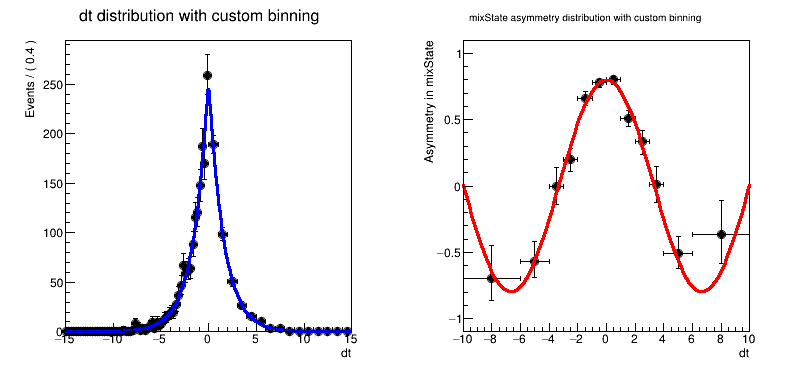

In [17]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()